In [167]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
import tensorflow as tf
from tensorflow import keras
sns.set_style("darkgrid")

In [168]:
# Path for csv files
#files_path ='../../../raw_data/'
files_path ='../../notebooks/data_collection/'

# Num of trips
df = pd.read_csv(files_path + 'matrix.csv', index_col='StartDate')
df.index = pd.to_datetime(df.index)

station_number = '59'

# Choice of Station
df=df[[station_number]]

In [169]:
df

,59
StartDate,
2022-01-01 00:00:00,5
2022-01-01 01:00:00,1
2022-01-01 02:00:00,1
2022-01-01 03:00:00,0
2022-01-01 04:00:00,-2
...,...
2022-12-30 20:00:00,3
2022-12-30 21:00:00,-1
2022-12-30 22:00:00,1


In [170]:
df.index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-12-30 15:00:00', '2022-12-30 16:00:00',
               '2022-12-30 17:00:00', '2022-12-30 18:00:00',
               '2022-12-30 19:00:00', '2022-12-30 20:00:00',
               '2022-12-30 21:00:00', '2022-12-30 22:00:00',
               '2022-12-30 23:00:00', '2022-12-31 00:00:00'],
              dtype='datetime64[ns]', name='StartDate', length=8684, freq=None)

In [127]:
files_path2 ='../../../raw_data/data_1year/'

# Load features
features_preproc = pd.read_csv(files_path2 + 'final_features_preproc_12m.csv')
features_preproc.set_index(features_preproc.columns[0],inplace=True)

# Change 2s
features_preproc["event_title_nan"] = features_preproc["event_title_nan"].apply(lambda x: 1 if x>=1 else 0)

# Change names
features_preproc.rename(columns={"event_title_nan": "no_event"}, inplace=True)

#Drop Columns
features_preproc.drop(columns=['minute','second','London_zone_London_all'], inplace=True)

In [128]:
features_preproc

,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,daytime,London_zone_Central,London_zone_South_East,London_zone_East,...,event_title_Spring bank holiday,event_title_Summer bank holiday,event_title_Survival Sunday (Premier League),event_title_Taste of London,event_title_Trooping the Colour,event_title_UEFA Women Euro Final,event_title_Wimbledon Tennis Championships,event_title_Winter Wonderland,event_title_World Cup 2022 1/4 final,no_event
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-02 00:00:00,0.429952,0.010204,0.0,1.0,0.108333,0.523677,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 01:00:00,0.427536,0.010204,0.0,1.0,0.330000,0.662953,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 02:00:00,0.427536,0.000000,0.0,1.0,0.310000,0.668524,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 03:00:00,0.427536,0.000000,0.0,1.0,0.283333,0.688022,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2022-01-02 04:00:00,0.427536,0.000000,0.0,1.0,0.283333,0.688022,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 19:00:00,0.729469,0.061224,0.0,2.0,0.383333,1.136490,0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2023-01-01 20:00:00,0.685990,0.122449,0.0,2.0,0.246667,1.119777,0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2023-01-01 21:00:00,0.676329,0.142857,0.0,2.0,0.190000,1.275766,0,2.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [129]:
features_preproc.index = pd.to_datetime(features_preproc.index)

In [130]:
df = df.join(features_preproc)

In [131]:
df=df.dropna()

In [132]:
df=df.rename(columns={station_number:'nooftrips'})

In [133]:
# Converting the index as date
df.index = pd.to_datetime(df.index)

In [134]:
df

,nooftrips,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,daytime,London_zone_Central,London_zone_South_East,...,event_title_Spring bank holiday,event_title_Summer bank holiday,event_title_Survival Sunday (Premier League),event_title_Taste of London,event_title_Trooping the Colour,event_title_UEFA Women Euro Final,event_title_Wimbledon Tennis Championships,event_title_Winter Wonderland,event_title_World Cup 2022 1/4 final,no_event
StartDate,,,,,,,,,,,,,,,,,,,,,
2022-01-02 00:00:00,-4,0.429952,0.010204,0.0,1.00,0.108333,0.523677,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-02 01:00:00,0,0.427536,0.010204,0.0,1.00,0.330000,0.662953,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-02 02:00:00,0,0.427536,0.000000,0.0,1.00,0.310000,0.668524,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-02 03:00:00,0,0.427536,0.000000,0.0,1.00,0.283333,0.688022,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-02 04:00:00,0,0.427536,0.000000,0.0,1.00,0.283333,0.688022,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 20:00:00,0,0.396135,0.000000,0.0,0.76,0.401667,0.635097,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2022-12-30 21:00:00,0,0.388889,0.000000,0.0,1.00,0.380000,0.629526,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2022-12-30 22:00:00,-6,0.384058,0.000000,0.0,1.00,0.388333,0.629526,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [135]:
df = df[['nooftrips', 'temperature', 'rainfall', 'snowfall', 'cloudcover',
       'wind_speed', 'wind_direction','weekday','strike', 'school_holidays']]

In [136]:
df['hour'] = df.index.hour
df['weekday'] = df.index.dayofweek
df['day'] = df.index.day
df['month'] = df.index.month

/var/folders/l4/v89sdcdj5735tcxsl3t9l82w0000gn/T/ipykernel_81170/681386165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
/var/folders/l4/v89sdcdj5735tcxsl3t9l82w0000gn/T/ipykernel_81170/681386165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df.index.dayofweek
/var/folders/l4/v89sdcdj5735tcxsl3t9l82w0000gn/T/ipykernel_81170/681386165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [137]:
df.head()

,nooftrips,temperature,rainfall,snowfall,cloudcover,wind_speed,wind_direction,weekday,strike,school_holidays,hour,day,month
StartDate,,,,,,,,,,,,,
2022-01-02 00:00:00,-4,0.429952,0.010204,0.0,1.0,0.108333,0.523677,6,0.0,1.0,0,2,1
2022-01-02 01:00:00,0,0.427536,0.010204,0.0,1.0,0.330000,0.662953,6,0.0,1.0,1,2,1
2022-01-02 02:00:00,0,0.427536,0.000000,0.0,1.0,0.310000,0.668524,6,0.0,1.0,2,2,1
2022-01-02 03:00:00,0,0.427536,0.000000,0.0,1.0,0.283333,0.688022,6,0.0,1.0,3,2,1
2022-01-02 04:00:00,0,0.427536,0.000000,0.0,1.0,0.283333,0.688022,6,0.0,1.0,4,2,1


<Axes: xlabel='StartDate', ylabel='nooftrips'>

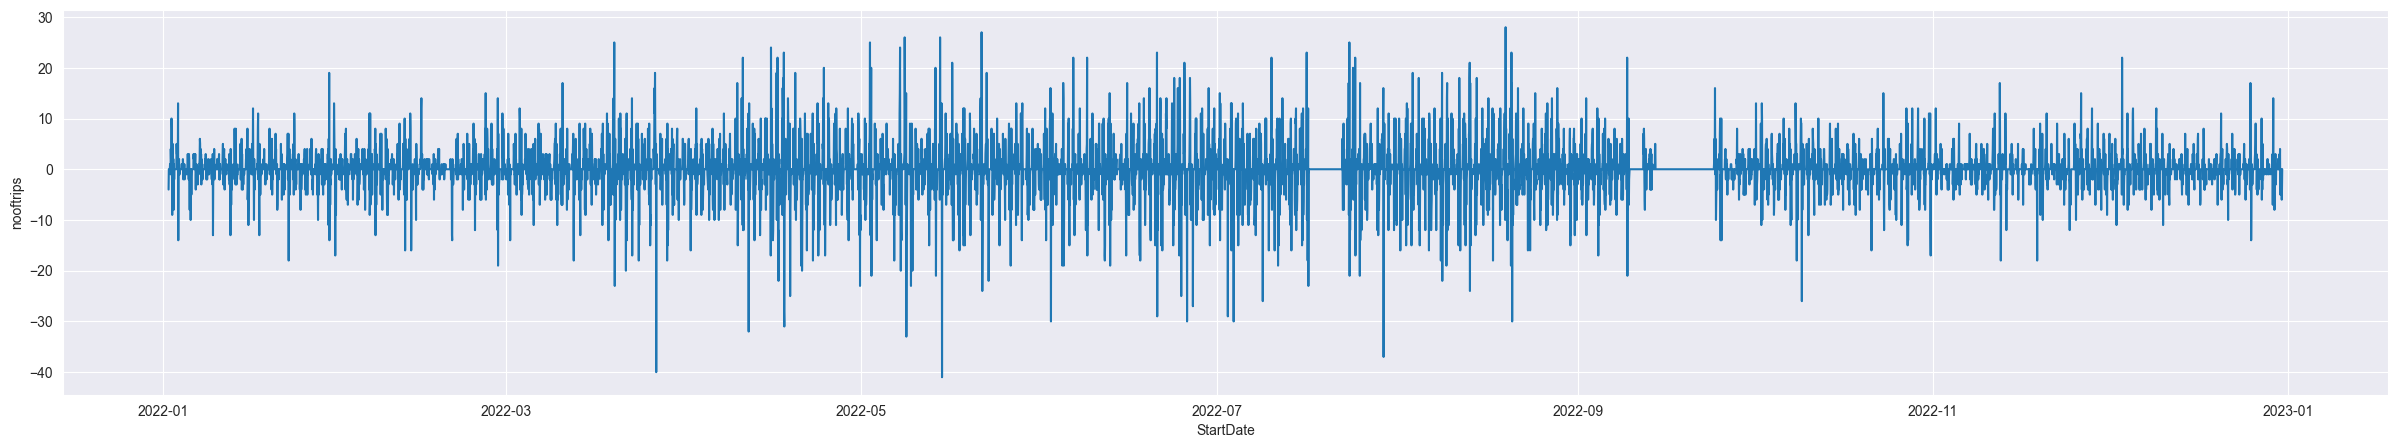

In [138]:
plt.figure(figsize=(30, 5))
sns.lineplot(x=df.index, y='nooftrips',data=df)

<Axes: xlabel='StartDate', ylabel='nooftrips'>

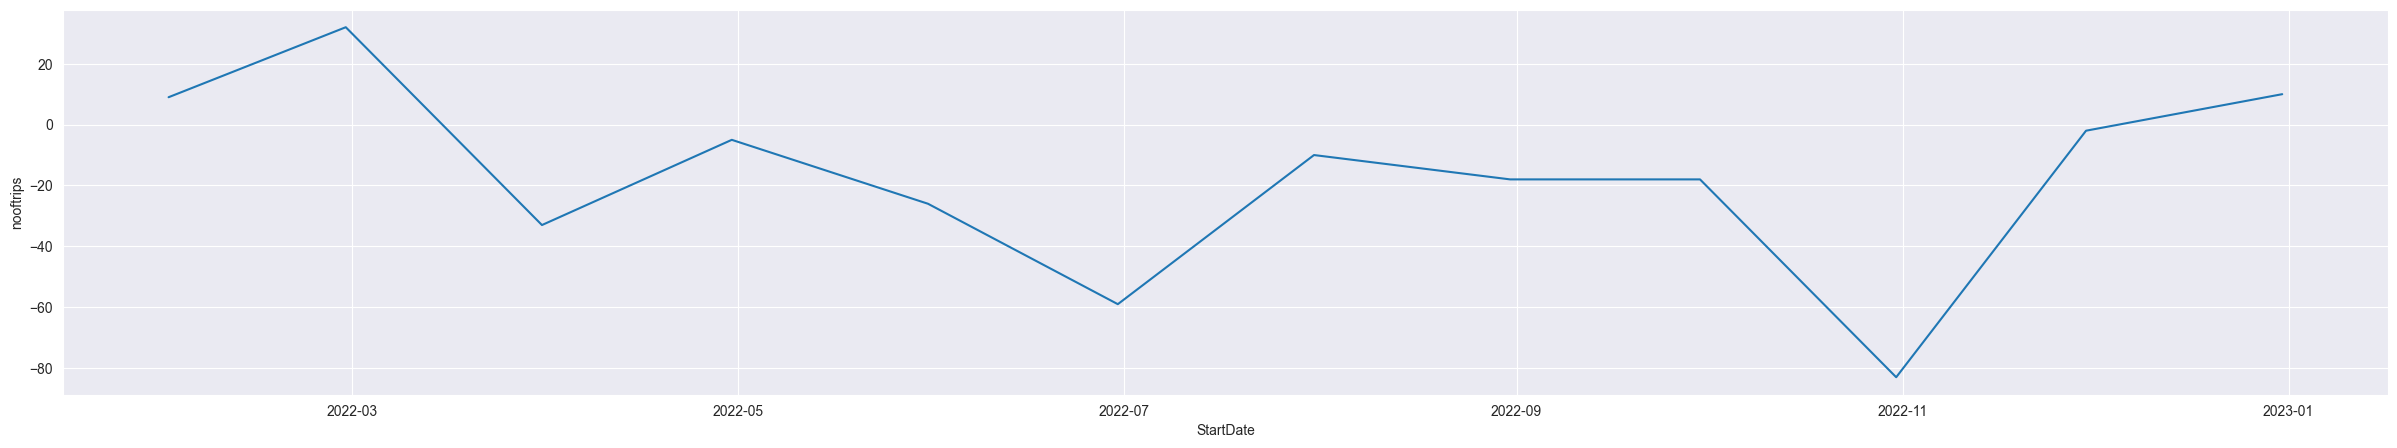

In [139]:
df_by_month = df.resample('M').sum()
plt.figure(figsize=(30,5))
sns.lineplot(x=df_by_month.index, y='nooftrips',data=df_by_month)

<Axes: xlabel='hour', ylabel='nooftrips'>

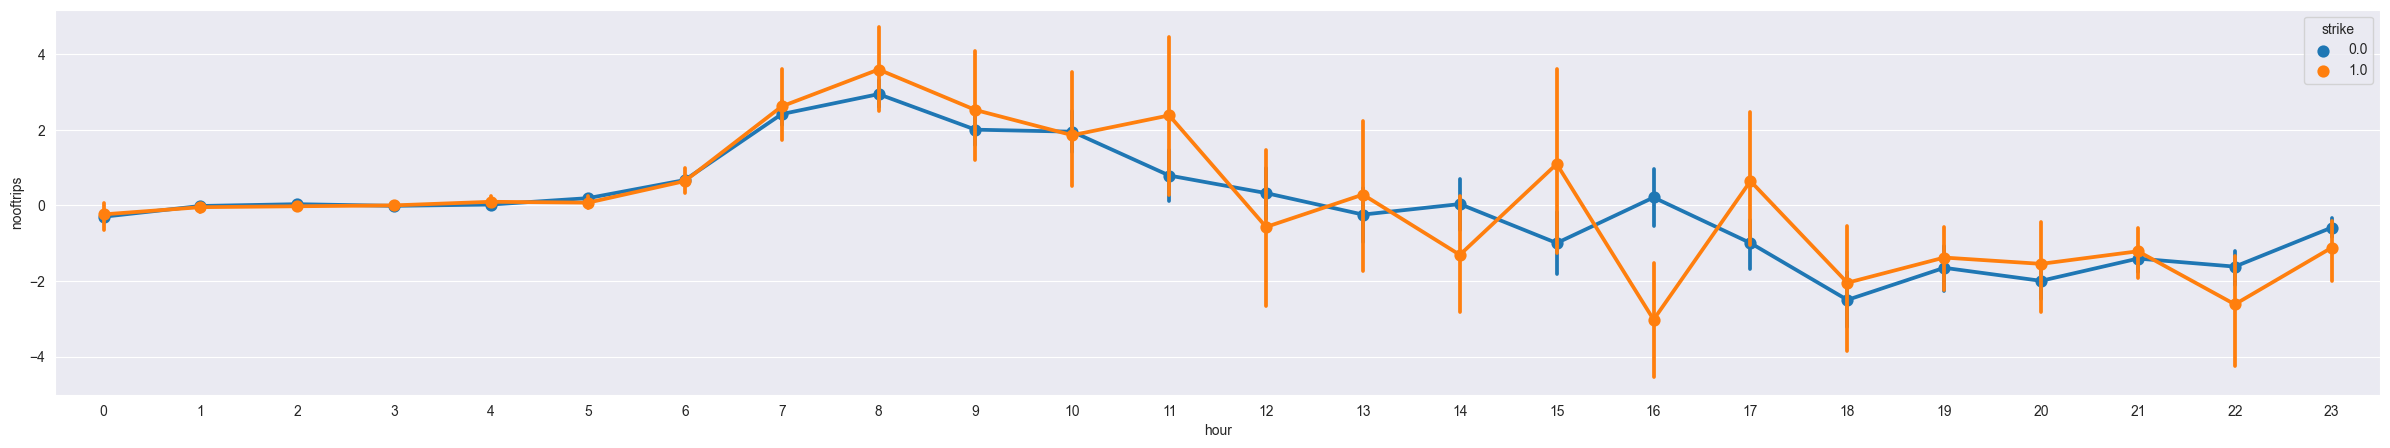

In [140]:
plt.figure(figsize=(30, 5))
sns.pointplot(x='hour', y='nooftrips', hue = 'strike',data=df)

<Axes: xlabel='weekday', ylabel='nooftrips'>

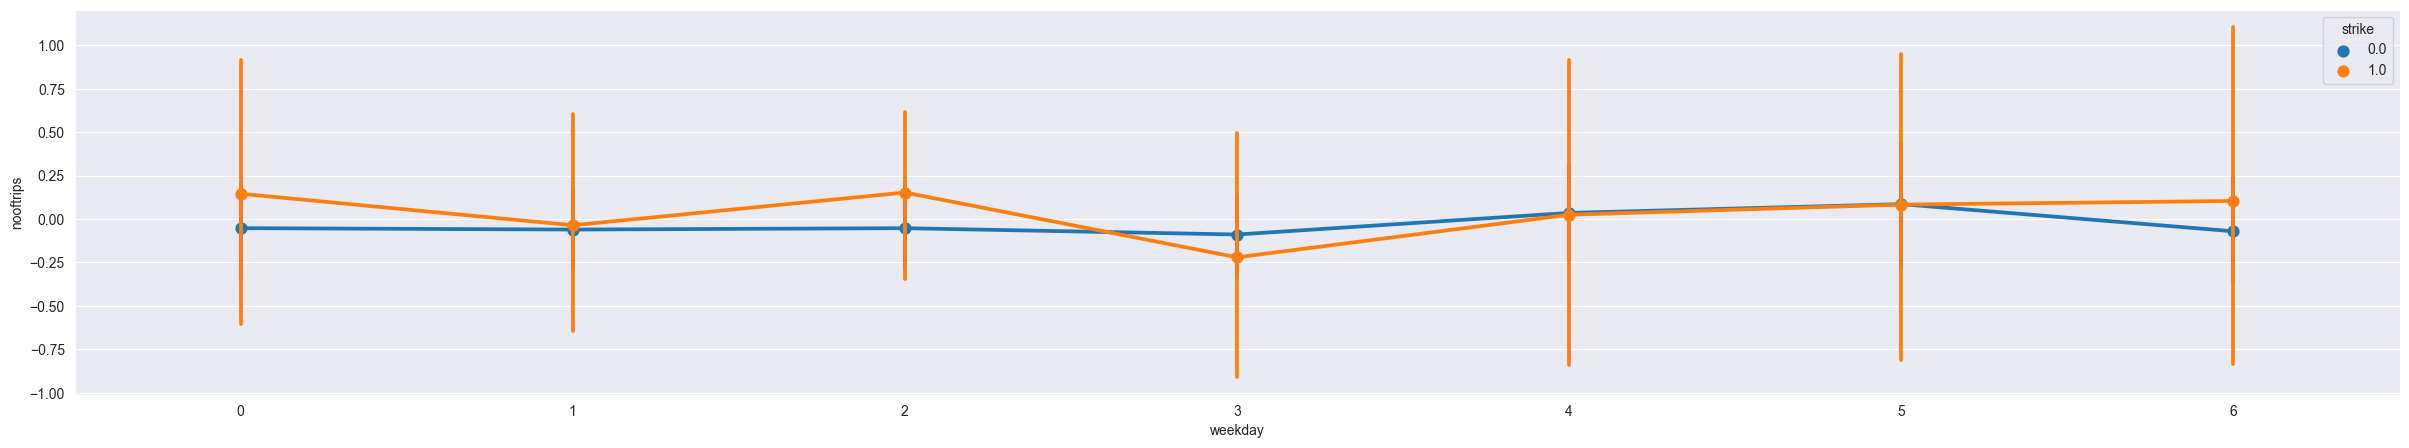

In [141]:
plt.figure(figsize=(30, 5))
sns.pointplot(x='weekday', y='nooftrips', hue='strike',data=df)

In [142]:
import math
# Get/Compute the number of rows to train the model on
training_data_len = math.ceil(len(df) *.9) # taking 90% of data to train and 10% of data to test
testing_data_len = len(df) - training_data_len

time_steps = 24
train, test = df.iloc[0:training_data_len], df.iloc[(training_data_len-time_steps):len(df)]
print(df.shape, train.shape, test.shape)

(8660, 13) (7794, 13) (890, 13)


In [143]:
# Get/Compute the number of rows to train the model on
val_training_data_len = math.ceil(len(train) *.9) # taking 90% of data to train and 10% of data to test
val_testing_data_len = len(train) - val_training_data_len

time_steps = 24
val_train, val_test = train.iloc[0:val_training_data_len], train.iloc[(val_training_data_len-time_steps):len(train)]
print(train.shape, val_train.shape, val_test.shape)

(7794, 13) (7015, 13) (803, 13)


In [144]:
from sklearn.preprocessing import RobustScaler

In [145]:
#Scale the all of the data from columns ['nooftrips']
Robust_scale = RobustScaler().fit(val_train[['nooftrips']])
val_train['nooftrips'] = Robust_scale.transform(val_train[['nooftrips']])
val_test['nooftrips'] = Robust_scale.transform(val_test[['nooftrips']])
test['nooftrips'] = Robust_scale.transform(test[['nooftrips']])

/var/folders/l4/v89sdcdj5735tcxsl3t9l82w0000gn/T/ipykernel_81170/105250444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_train['nooftrips'] = Robust_scale.transform(val_train[['nooftrips']])
/var/folders/l4/v89sdcdj5735tcxsl3t9l82w0000gn/T/ipykernel_81170/105250444.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_test['nooftrips'] = Robust_scale.transform(val_test[['nooftrips']])
/var/folders/l4/v89sdcdj5735tcxsl3t9l82w0000gn/T/ipykernel_81170/105250444.py:5: SettingWithCopyWarning: 
A valu

In [146]:
train.columns

Index(['nooftrips', 'temperature', 'rainfall', 'snowfall', 'cloudcover',
       'wind_speed', 'wind_direction', 'weekday', 'strike', 'school_holidays',
       'hour', 'day', 'month'],
      dtype='object')

In [147]:
train.to_numpy()
test.to_numpy()

array([[ 0.00000000e+00,  3.35748792e-01,  0.00000000e+00, ...,
         2.30000000e+01,  2.30000000e+01,  1.10000000e+01],
       [-5.00000000e-01,  3.26086957e-01,  0.00000000e+00, ...,
         0.00000000e+00,  2.40000000e+01,  1.10000000e+01],
       [ 0.00000000e+00,  3.18840580e-01,  0.00000000e+00, ...,
         1.00000000e+00,  2.40000000e+01,  1.10000000e+01],
       ...,
       [-3.00000000e+00,  3.84057971e-01,  0.00000000e+00, ...,
         2.20000000e+01,  3.00000000e+01,  1.20000000e+01],
       [-2.00000000e+00,  3.76811594e-01,  1.02040816e-02, ...,
         2.30000000e+01,  3.00000000e+01,  1.20000000e+01],
       [ 0.00000000e+00,  7.53623188e-01,  0.00000000e+00, ...,
         0.00000000e+00,  3.10000000e+01,  1.20000000e+01]])

In [148]:
#Split the data into x_train and y_train data sets
X_val_train = []
y_val_train = []

for i in range(len(val_train) - time_steps):
    X_val_train.append(val_train.drop(columns='nooftrips').iloc[i:i + time_steps].to_numpy())
    y_val_train.append(val_train.loc[:,'nooftrips'].iloc[i + time_steps])

#Convert x_train and y_train to numpy arrays
X_val_train = np.array(X_val_train)
y_val_train = np.array(y_val_train)

In [149]:
#Create the x_test and y_test data sets
X_val_test = []
y_val_test = train.loc[:,'nooftrips'].iloc[val_training_data_len:len(train)]

for i in range(len(val_test) - time_steps):
    X_val_test.append(val_test.drop(columns='nooftrips').iloc[i:i + time_steps].to_numpy())

#Convert x_test and y_test to numpy arrays
X_val_test = np.array(X_val_test)
y_val_test = np.array(y_val_test)

In [150]:
#Create the x_test and y_test data sets
X_test = []
y_test = df.loc[:,'nooftrips'].iloc[training_data_len:len(df)]

for i in range(len(test) - time_steps):
    X_test.append(test.drop(columns='nooftrips').iloc[i:i + time_steps].to_numpy())
    #y_test.append(test.loc[:,'cnt'].iloc[i + time_steps])

#Convert x_test and y_test to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

In [151]:
# [samples, time_steps, n_features]
# Using all 12 columns of data (take out the bike sharing amount column) to make prediction
print('Validation Train data size:')
print(X_val_train.shape, y_val_train.shape)
print('Validation Test data size:')
print(X_val_test.shape, y_val_test.shape)
print('Test data size:')
print(X_test.shape, y_test.shape)

Validation Train data size:
(6991, 24, 12) (6991,)
Validation Test data size:
(779, 24, 12) (779,)
Test data size:
(866, 24, 12) (866,)


In [152]:
#Build the LSTM network model
model = keras.Sequential()
model.add(keras.layers.Bidirectional(
    keras.layers.LSTM(units=100, activation='tanh',input_shape=(X_val_train.shape[1], X_val_train.shape[2]))))
model.add(keras.layers.Dense(75))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(40))
model.add(keras.layers.Dense(30))
model.add(keras.layers.Dense(units=1))
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [153]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10, restore_best_weights=True)

In [154]:
history = model.fit(X_val_train, y_val_train, epochs=50, batch_size=20, validation_data=(X_val_test,y_val_test), shuffle=True, callbacks=[es])

Epoch 1/50


2023-09-04 17:48:00.867974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 17:48:01.173596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 17:48:01.188693: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 17:48:01.462397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 17:48:01.482595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


350/350 [==============================] - ETA: 0s - loss: 6.1826

2023-09-04 17:48:12.357670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 17:48:12.459428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 17:48:12.469880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


350/350 [==============================] - 14s 33ms/step - loss: 6.1826 - val_loss: 10.6943
Epoch 2/50
350/350 [==============================] - 10s 30ms/step - loss: 5.9768 - val_loss: 10.5530
Epoch 3/50
350/350 [==============================] - 10s 29ms/step - loss: 5.9209 - val_loss: 10.2956
Epoch 4/50
350/350 [==============================] - 10s 30ms/step - loss: 5.8959 - val_loss: 10.4179
Epoch 5/50
350/350 [==============================] - 10s 29ms/step - loss: 5.9730 - val_loss: 10.4377
Epoch 6/50
350/350 [==============================] - 10s 29ms/step - loss: 5.8715 - val_loss: 10.3358
Epoch 7/50
350/350 [==============================] - 10s 29ms/step - loss: 5.8658 - val_loss: 10.3403
Epoch 8/50
350/350 [==============================] - 10s 29ms/step - loss: 5.8235 - val_loss: 10.3545
Epoch 9/50
350/350 [==============================] - 10s 29ms/step - loss: 5.8153 - val_loss: 10.5043
Epoch 10/50
350/350 [==============================] - 10s 29ms/step - loss: 5.8040 

In [155]:
y_pred = model.predict(X_test)
y_pred = Robust_scale.inverse_transform(y_pred)#Undo scaling
y_pred

2023-09-04 17:51:00.448391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 17:51:00.566865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-09-04 17:51:00.589921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 1s 19ms/step


array([[-0.8832533 ],
       [-0.15815902],
       [-0.01790651],
       [-0.2690161 ],
       [-0.15928861],
       [ 0.05183622],
       [ 0.34651   ],
       [ 0.78390247],
       [ 1.5520613 ],
       [ 2.4019732 ],
       [ 2.547108  ],
       [ 2.1951249 ],
       [ 1.6628408 ],
       [ 1.1200943 ],
       [ 0.6419116 ],
       [ 0.22806183],
       [-0.14923687],
       [-0.48795038],
       [-0.80901206],
       [-1.1171167 ],
       [-1.3560368 ],
       [-1.5382193 ],
       [-1.6370517 ],
       [-1.5512482 ],
       [-0.8842695 ],
       [-0.0853522 ],
       [ 0.02145423],
       [-0.26239628],
       [-0.1861384 ],
       [-0.0250573 ],
       [ 0.19102523],
       [ 0.5005367 ],
       [ 1.0646338 ],
       [ 1.9932207 ],
       [ 2.4910522 ],
       [ 2.328508  ],
       [ 1.8718711 ],
       [ 1.3329401 ],
       [ 0.8293409 ],
       [ 0.37360558],
       [-0.01962676],
       [-0.3747348 ],
       [-0.69150853],
       [-0.9795727 ],
       [-1.2157273 ],
       [-1

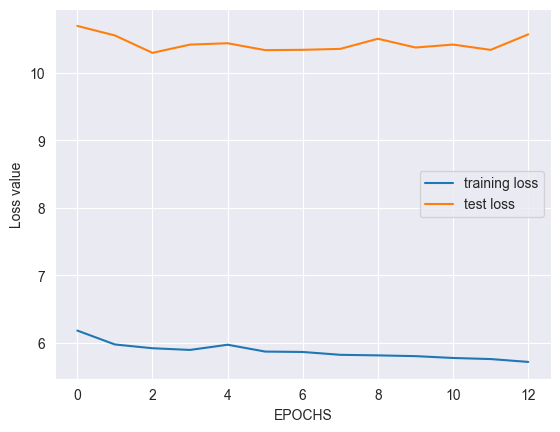

In [156]:
fig,ax = plt.subplots()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Loss value')
plt.legend();

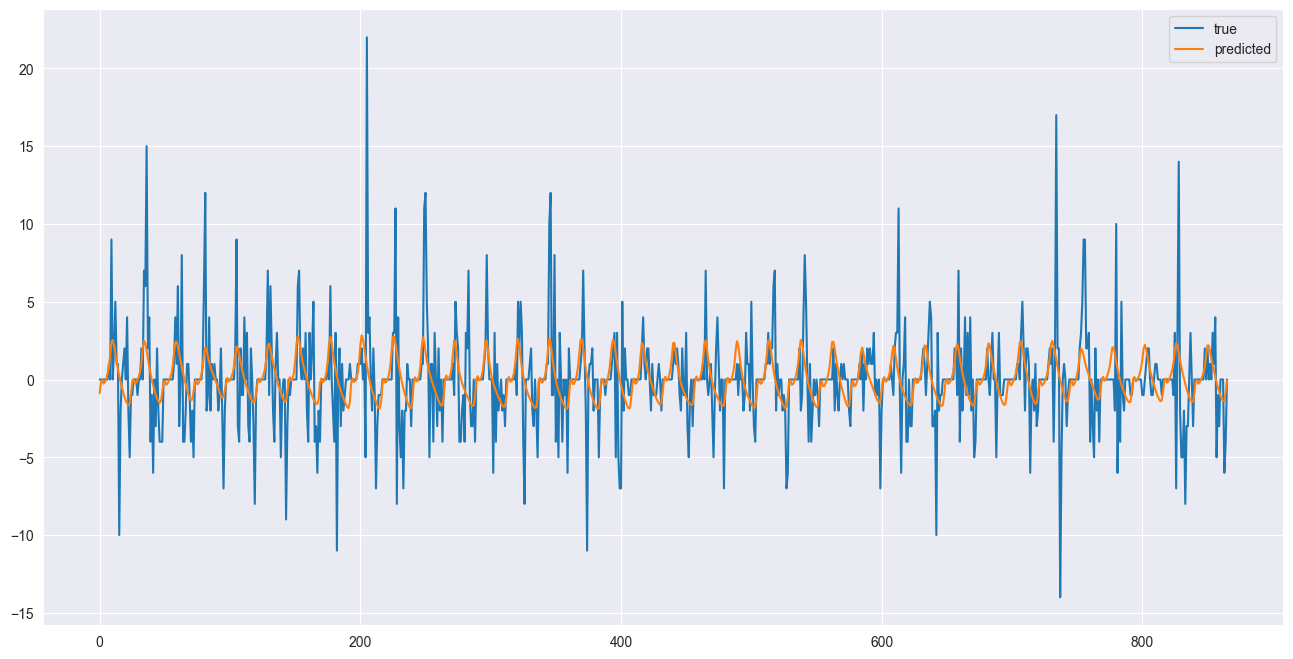

In [157]:
#Pcik some values to zoom in
plt.figure(figsize=(16, 8))
plt.plot(y_test, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()

In [86]:
second=np.round(y_pred.reshape((len(y_pred))))

In [123]:
first=np.round(y_pred.reshape((len(y_pred))))

In [158]:
third=np.round(y_pred.reshape((len(y_pred))))

In [164]:
df=pd.DataFrame(second)

In [166]:
df.to_csv('third.csv')